# COVID 19 Cases in Mexico City Data Cleanup & Exploration
***
### This notebook contains the exploration and cleaning process of various csv files provided by the Sistema Nacional de Vigilancia Epidemiologica in Mexico City

### Resource
- https://archivo.datos.cdmx.gob.mx/sinave-colonias/?C=M;O=A
-https://datos.cdmx.gob.mx/dataset/covid-19-sinave-ciudad-de-mexico-a-nivel-colonia

<div class="alert alert-block alert-info">
<b>Important note:</b> The data provided by SINAVE records active cases day by day (not new cases), so we cannot use the aggregate sum of all cases in the charts, we summarize the total cases per day per district, and then show the average cases that there was that day in all districts.
</div>


In [1]:
# Import packages and dependencies
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('classic')
import numpy as np

%matplotlib inline

# We configure pandas in order to see the complete rows and columns of our data frames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [2]:
# All files downloaded from the 
all_filenames = [i for i in glob.glob("../Resources/Historico Sinave/*.csv")]
# all_filenames


## Exploration

First we must explore the structure of each csv, as we see in the data frame displayer below, we have Alcaldia (Delegación), Colonia and positive COVID 19 cases registered in that particular date, date format is based in YYMMDD.

In [3]:
df_exploration = pd.read_csv(all_filenames[0])
df_exploration.head()

,alcaldia,colonia,clave_colonia,total_200629,total_200630,total_200701
0,GUSTAVO A. MADERO,BENITO JUAREZ,05-011,NaN,6.0,NaN
1,GUSTAVO A. MADERO,CONSTITUCION DE LA REPUBLICA,05-029,8.0,7.0,NaN
2,GUSTAVO A. MADERO,CUCHILLA DEL TESORO,05-035,12.0,11.0,11.0
3,GUSTAVO A. MADERO,GERTRUDIS SANCHEZ 2A SECCION,05-067,7.0,NaN,NaN
4,GUSTAVO A. MADERO,MARTIRES DE RIO BLANCO,05-124,8.0,8.0,8.0


## Exploration part 2

Understanding that each csv file **contains different dates**, we must know what dates are registered in each csv file. With the help of a **for loop** we enter to each csv file and displayed all columns contained:

In [4]:
for f in all_filenames:
    print("---------------------")
    print("The file is "+ f)
    print(pd.read_csv(f).columns)
    

---------------------
The file is Historico Sinave\200701_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200629', 'total_200630',
       'total_200701'],
      dtype='object')
---------------------
The file is Historico Sinave\200702_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200629', 'total_200630',
       'total_200701', 'total_200702'],
      dtype='object')
---------------------
The file is Historico Sinave\200703_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200629', 'total_200630',
       'total_200701', 'total_200702', 'total_200703'],
      dtype='object')
---------------------
The file is Historico Sinave\200704_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200629', 'total_200630',
       'total_200701', 'total_200702', 'total_200703', 'total_200704'],
      dtype='object')
---------------------
The file is Historico Sinave\200705_base_historica.csv
Index(['alcaldia', 

---------------------
The file is Historico Sinave\200731_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200629', 'total_200630',
       'total_200701', 'total_200702', 'total_200703', 'total_200704',
       'total_200705', 'total_200706', 'total_200707', 'total_200708',
       'total_200709', 'total_200710', 'total_200711', 'total_200712',
       'total_200713', 'total_200714', 'total_200715', 'total_200716',
       'total_200717', 'total_200718', 'total_200719', 'total_200720',
       'total_200721', 'total_200722', 'total_200723', 'total_200724',
       'total_200726', 'total_200727', 'total_200728', 'total_200729',
       'total_200730', 'total_200731'],
      dtype='object')
---------------------
The file is Historico Sinave\200801_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'total_200801'], dtype='object')
---------------------
The file is Historico Sinave\200802_base_historica.csv
Index(['alcaldia', 'colonia', 'clave_colonia', 'tot

Index(['Unnamed: 0', 'alcaldia', 'colonia', 'clave_colonia', 'total_200827',
       'total_200828', 'total_200829', 'total_200830', 'total_200831',
       'total_200901', 'total_200902'],
      dtype='object')
---------------------
The file is Historico Sinave\historico_sinave_sem2_dic20.csv
Index(['Unnamed: 0', 'alcaldia', 'colonia', 'clave_colonia', 'total_201212',
       'total_201214', 'total_201213', 'total_201215', 'total_201216',
       'total_201217', 'total_201218'],
      dtype='object')
---------------------
The file is Historico Sinave\historico_sinave_sem2_ene21.csv
Index(['Unnamed: 0', 'alcaldia', 'colonia', 'clave_colonia', 'total_210111',
       'total_210112', 'total_210113', 'total_210114', 'total_210115',
       'total_210116', 'total_210117'],
      dtype='object')
---------------------
The file is Historico Sinave\historico_sinave_sem2_feb21.csv
Index(['Unnamed: 0', 'alcaldia', 'colonia', 'clave_colonia', 'total_201122',
       'total_201123', 'total_201204', 'tota

# Select files for 2020
Down below we can see a summary of the dates contained in each csv file, we are only interested in the data recorded for year 2020, so we will save this file names in a new list in order to merge them later

| File name | Date Range |
| :----| :----|
| 200731_base_historica.csv   | (20-06-29 al 20-07-31) |
| 200819_base_historica.csv | (20-08-01 al 20-08-19) |
| historico_sinave_sem1_ago20.csv | (20-08-20 al 20-08-26) |
| historico_sinave_sem2_ago20.csv | (20-08-27 al 20-09-02) |
| historico_sinave_sem36_ago20.csv | (20-08-31 al 20-09-06) |
| historico-sinave.csv | (20-09-05 al 20-12-13) |
| historico_sinave_sem51_dic20.csv | (20-12-14 al 20-12-20) |
| historico_sinave_sem52_dic20.csv | (20-12-21 al 20-12-27) |
| historico_sinave_sem53_dic20.csv | (20-12-28 al 21-01-03) |

In [5]:
file_names2020=['200731_base_historica.csv', '200819_base_historica.csv', 'historico_sinave_sem1_ago20.csv', 'historico_sinave_sem2_ago20.csv', 'historico_sinave_sem36_ago20.csv', 'historico-sinave.csv', 'historico_sinave_sem51_dic20.csv', 'historico_sinave_sem52_dic20.csv', 'historico_sinave_sem53_dic20.csv']

## Merging and Cleaning

The process to combine all csv files was through merge method and drop the extra lines added of *Alcaldia* and *Colonia*.
<br>
At the end we can see a final clean dropping some columns not needed and renaming some dates headers.

In [6]:
dfmerge=[]

dfmerge = pd.read_csv('Historico Sinave/'+file_names2020[0])
dfmerge = dfmerge.rename(columns={"colonia":"Colonia",'alcaldia':'Alcaldia'})
i=1

for f in file_names2020[1:]:
    
    df2=pd.read_csv('Historico Sinave/'+f)
    
    dfmerge = dfmerge.merge(df2, how="outer", on="clave_colonia")
    dfmerge.drop(['alcaldia','colonia'],axis=1, inplace=True)
    dfmerge.columns
    
    i += 1

    

dfmerge.drop(['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0','total_200831_y', 'total_200901_y', 
              'total_200902_y','total_200905_y', 'total_200906_y','total_210101','total_210102',
             'total_210103'],axis=1, inplace=True)

dfmerge=dfmerge.rename(columns={'total_200831_x':'total_200831', 'total_200901_x':'total_200901', 
                                'total_200902_x':'total_200902','total_200905_x':'total_200905', 
                                'total_200906_x':'total_200906'})


In [7]:
dfmerge.head(2)

,Alcaldia,Colonia,clave_colonia,total_200629,total_200630,total_200701,total_200702,total_200703,total_200704,total_200705,total_200706,total_200707,total_200708,total_200709,total_200710,total_200711,total_200712,total_200713,total_200714,total_200715,total_200716,total_200717,total_200718,total_200719,total_200720,total_200721,total_200722,total_200723,total_200724,total_200726,total_200727,total_200728,total_200729,total_200730,total_200731,total_200801,total_200802,total_200803,total_200804,total_200805,total_200806,total_200807,total_200808,total_200809,total_200810,total_200811,total_200812,total_200813,total_200814,total_200815,total_200816,total_200817,total_200818,total_200819,total_200820,total_200821,total_200822,total_200823,total_200824,total_200825,total_200826,total_200827,total_200828,total_200829,total_200830,total_200831,total_200901,total_200902,total_200903,total_200904,total_200905,total_200906,total_200907,total_200908,total_200909,total_200910,total_200911,total_200912,total_200913,total_200914,total_200915,total_200916,total_200917,total_200918,total_200919,total_200920,total_200921,total_200922,total_200923,total_200924,total_200925,total_200926,total_200927,total_200928,total_200929,total_200930,total_201001,total_201002,total_201003,total_201004,total_201005,total_201006,total_201007,total_201008,total_201009,total_201010,total_201011,total_201012,total_201013,total_201014,total_201015,total_201016,total_201017,total_201018,total_201019,total_201020,total_201021,total_201022,total_201023,total_201024,total_201025,total_201026,total_201027,total_201028,total_201029,total_201030,total_201031,total_201101,total_201102,total_201103,total_201104,total_201105,total_201106,total_201107,total_201108,total_201109,total_201110,total_201111,total_201112,total_201113,total_201114,total_201115,total_201116,total_201117,total_201118,total_201119,total_201121,total_201122,total_201123,total_201125,total_201126,total_201127,total_201128,total_201129,total_201130,total_201201,total_201202,total_201203,total_201205,total_201206,total_201207,total_201208,total_201209,total_201210,total_201211,total_201212,total_201213,total_201214,total_201215,total_201216,total_201217,total_201218,total_201219,total_201220,total_201221,total_201222,total_201223,total_201224,total_201225,total_201226,total_201227,total_201228,total_201229,total_201230,total_201231
0,GUSTAVO A. MADERO,BENITO JUAREZ,05-011,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,7.0,7.0,7.0,7.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,7.0,11.0,12.0,12.0,26.0,13.0,15.0,16.0,15.0,15.0,16.0,14.0,NaN,14.0,13.0,12.0,15.0,15.0,15.0,13.0,13.0,16.0,16.0,15.0,17.0,15.0,17.0,16.0,21.0,21.0,23.0
1,GUSTAVO A. MADERO,CONSTITUCION DE LA REPUBLICA,05-029,8.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,9.0,9.0,8.0,9.0,8.0,7.0,7.0,6.0,6.0,7.0,8.0,6.0,NaN,NaN,6.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,7.0,7.0,7.0,7.0,7.0,7.0,9.0,10.0,10.0,9.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,6.0,6.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,9.0,9.0,8.0,NaN,NaN,NaN,NaN,8.0,9.0,7.0,8.0,7.0,6.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,9.0,10.0,13.0,13.0,15.0,35.0,17.0,17.0,22.0,24.0,28.0,29.0,37.0,NaN,37.0,42.0,40.0,40.0,47.0,46.0,41.0,39.0,45.0,44.0,41.0,44.0,38.0,37.0,31.0,32

## Outliers

While doing the last plot, we saw a outlier of cases for the date (13/12/2020) with a total of **32,863 cases**.
<br>



<div class="alert alert-block alert-danger">
<b>Line 781:</b> When we display that particular day, we notice this value is only registered in one row, when we search for that line (781), this cases have no specified neighborhood. As we cannot track the District or the Neighbor, we substract this line from the analysis.
</div>

In [8]:
dfmerge[dfmerge['clave_colonia']=='Colonia no especificada']

,Alcaldia,Colonia,clave_colonia,total_200629,total_200630,total_200701,total_200702,total_200703,total_200704,total_200705,total_200706,total_200707,total_200708,total_200709,total_200710,total_200711,total_200712,total_200713,total_200714,total_200715,total_200716,total_200717,total_200718,total_200719,total_200720,total_200721,total_200722,total_200723,total_200724,total_200726,total_200727,total_200728,total_200729,total_200730,total_200731,total_200801,total_200802,total_200803,total_200804,total_200805,total_200806,total_200807,total_200808,total_200809,total_200810,total_200811,total_200812,total_200813,total_200814,total_200815,total_200816,total_200817,total_200818,total_200819,total_200820,total_200821,total_200822,total_200823,total_200824,total_200825,total_200826,total_200827,total_200828,total_200829,total_200830,total_200831,total_200901,total_200902,total_200903,total_200904,total_200905,total_200906,total_200907,total_200908,total_200909,total_200910,total_200911,total_200912,total_200913,total_200914,total_200915,total_200916,total_200917,total_200918,total_200919,total_200920,total_200921,total_200922,total_200923,total_200924,total_200925,total_200926,total_200927,total_200928,total_200929,total_200930,total_201001,total_201002,total_201003,total_201004,total_201005,total_201006,total_201007,total_201008,total_201009,total_201010,total_201011,total_201012,total_201013,total_201014,total_201015,total_201016,total_201017,total_201018,total_201019,total_201020,total_201021,total_201022,total_201023,total_201024,total_201025,total_201026,total_201027,total_201028,total_201029,total_201030,total_201031,total_201101,total_201102,total_201103,total_201104,total_201105,total_201106,total_201107,total_201108,total_201109,total_201110,total_201111,total_201112,total_201113,total_201114,total_201115,total_201116,total_201117,total_201118,total_201119,total_201121,total_201122,total_201123,total_201125,total_201126,total_201127,total_201128,total_201129,total_201130,total_201201,total_201202,total_201203,total_201205,total_201206,total_201207,total_201208,total_201209,total_201210,total_201211,total_201212,total_201213,total_201214,total_201215,total_201216,total_201217,total_201218,total_201219,total_201220,total_201221,total_201222,total_201223,total_201224,total_201225,total_201226,total_201227,total_201228,total_201229,total_201230,total_201231
781,NaN,NaN,Colonia no especificada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1056.0,1026.0,1102.0,1087.0,1027.0,968.0,992.0,1056.0,1160.0,1198.0,1133.0,1056.0,1074.0,1057.0,1105.0,1218.0,1115.0,1088.0,1086.0,1148.0,1142.0,1198.0,1342.0,1541.0,1526.0,1560.0,1831.0,1929.0,1747.0,1761.0,1865.0,1765.0,1664.0,1709.0,1632.0,1550.0,1528.0,1582.0,1558.0,1631.0,1718.0,1744.0,1656.0,1690.0,1604.0,1495.0,1409.0,1278.0,1218.0,1170.0,1158.0,1142.0,1053.0,1065.0,1050.0,1062.0,1072.0,1164.0,1150.0,1119.0,1137.0,1260.0,1239.0,1282.0,1333.0,1369.0,1318.0,1208.0,1303.0,1360.0,1400.0,1380.0,1387.0,1287.0,1236.0,1221.0,1124.0,1031.0,1024.0,988.0,978.0,993.0,1019.0,1011.0,1023.0,977.0,1068.0,1004.0,1059.0,1136.0,1579.0,1879.0,2589.0,2765.0,2838.0,6074.0,3293.0,3121.0,2887.0,2660.0,2510.0,2590.0,2832.0,3015.0,6852.0,3561.0,3626.0,4068.0,4445.0,4846.0,5237.0,5582.0,32863.0,5398.0,5708.0,5806.0,5796.0,6123.0,6445.0,6198.0,5941.0,6684.0,6523.0,6686.0,6579.0,6126.0,5745.0,5333.0,5450.0,5356.0,5284.0


In [9]:
index=dfmerge[dfmerge['clave_colonia']=='Colonia no especificada'].index
dfmerge.drop(index,inplace=True)

## Unpivot Date columns

In order to transpose all date columns in one, we used the stack method containing all columns that we wanted to tranpose.

In [10]:
columns2=list(dfmerge.columns)
columns2.remove('Colonia')
columns2.remove('clave_colonia')

stacked_dates_by_district=dfmerge[columns2].set_index('Alcaldia').stack().reset_index()
stacked_dates_by_district=stacked_dates_by_district.rename(columns={'Alcaldia':'District','level_1':'Fecha', 0:'Casos positivos'})
stacked_dates_by_district['Fecha']=stacked_dates_by_district['Fecha'].str.replace('total_','')

Covid_bydistrict_bydate=stacked_dates_by_district.groupby(['District','Fecha']).sum().reset_index()
Covid_bydistrict=Covid_bydistrict_bydate.groupby(['District']).mean().reset_index()
Covid_bydate=Covid_bydistrict_bydate.groupby(['Fecha']).mean()
Covid_total=Covid_bydistrict_bydate.groupby(['Fecha']).sum()

## Summarize by Quarter

<div class="alert alert-block alert-success">
<b>Quarters:</b> We could have used the Period Index method with freq="Q", but we decided to use a binning as a example of a simple method learn in class.
</div>

In [11]:
bins_dt=[0,200331,200631,200931,201231]
labels=["2020Q1","2020Q2","2020Q3","2020Q4"]

Covid_bydistrict_bydate['Fecha'] = pd.to_numeric(Covid_bydistrict_bydate['Fecha'])
Covid_bydistrict_bydate["Quarter"] = pd.cut(Covid_bydistrict_bydate['Fecha'], bins_dt, labels=labels, include_lowest=True)
# Covid_bydistrict_bydate

## COVID-19 Evolution across Mexico city Plotting
***


## Total active cases in Mexico city by date

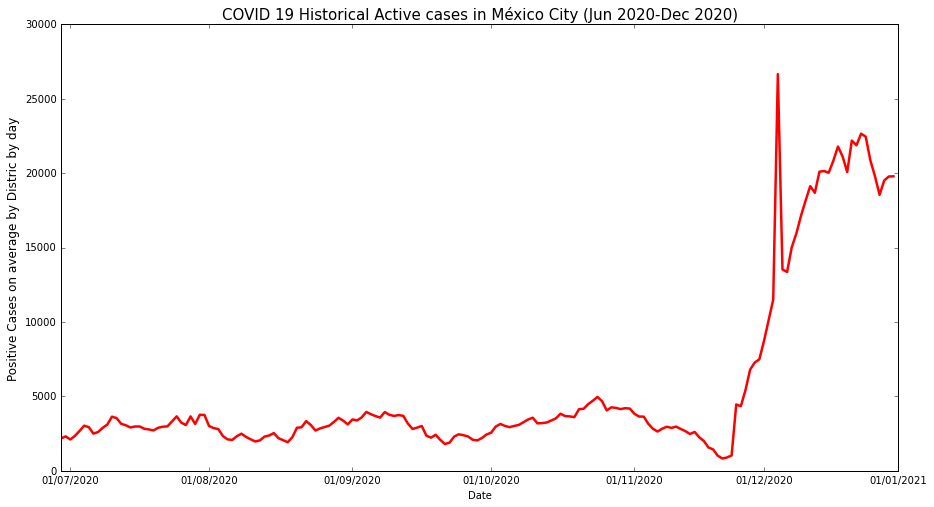

In [12]:
plt.figure(figsize=(15,8))
plt.plot(Covid_total,color='red',linewidth=2.5)
plt.xlabel("Date")

title_font={'fontsize': 15,'fontweight': 10}
label_font={'fontsize': 12,'fontweight': 10}

plt.xticks([2,32,63,93,124,152,181],['01/07/2020','01/08/2020','01/09/2020','01/10/2020','01/11/2020','01/12/2020','01/01/2021'])
plt.ylabel("Positive Cases on average by Distric by day",fontdict=label_font)
plt.title("COVID 19 Historical Active cases in México City (Jun 2020-Dec 2020)",fontdict=title_font)

plt.savefig('Total active cases in Mexico city by date.png')



## Average active cases in Mexico city by date

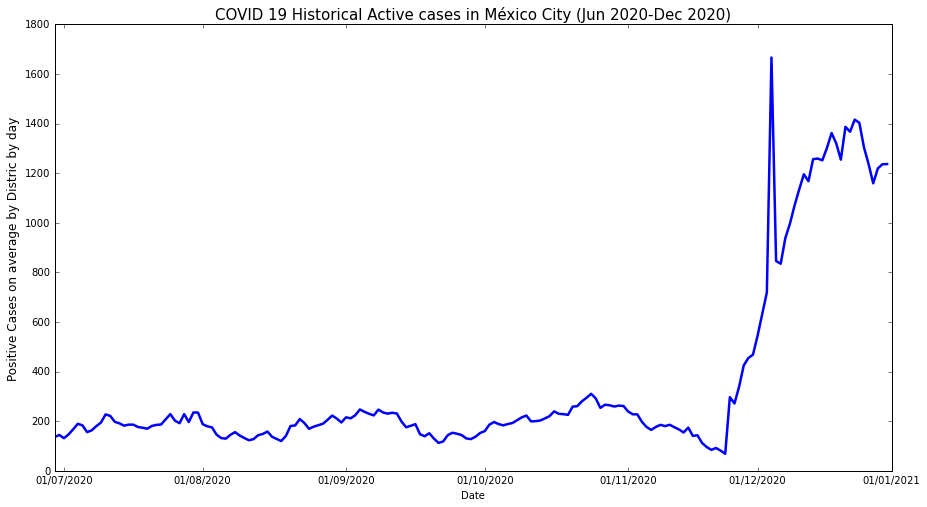

In [13]:
plt.figure(figsize=(15,8))
plt.plot(Covid_bydate, linewidth=2.5)
plt.xlabel("Date")

title_font={'fontsize': 15,'fontweight': 10}
label_font={'fontsize': 12,'fontweight': 10}

plt.xticks([2,32,63,93,124,152,181],['01/07/2020','01/08/2020','01/09/2020','01/10/2020','01/11/2020','01/12/2020','01/01/2021'])
plt.ylabel("Positive Cases on average by Distric by day",fontdict=label_font)
plt.title("COVID 19 Historical Active cases in México City (Jun 2020-Dec 2020)",fontdict=title_font)

plt.savefig('Average active cases in Mexico city by date.png')

## COVID-19 Evolution across Mexico City by District Plot
***


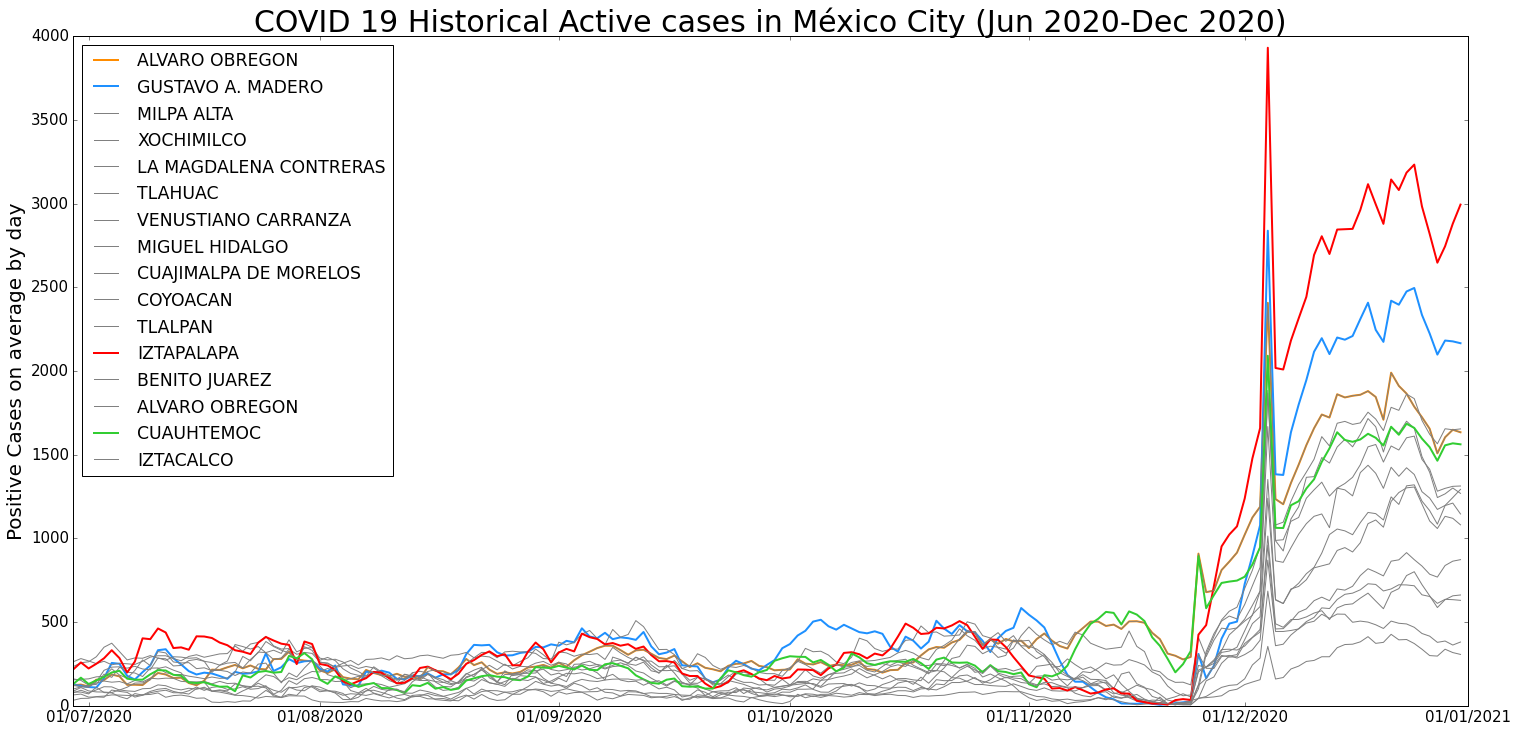

<Figure size 432x288 with 0 Axes>

In [14]:
Covid_bydistrict_bydate['Fecha'] = Covid_bydistrict_bydate['Fecha'].astype(str)

District_1=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='ALVARO OBREGON']
District_2=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='GUSTAVO A. MADERO']
District_3=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='MILPA ALTA']
District_4=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='XOCHIMILCO']
District_5=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='LA MAGDALENA CONTRERAS']
District_6=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='TLAHUAC']
District_7=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='VENUSTIANO CARRANZA']
District_8=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='MIGUEL HIDALGO']
District_9=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='CUAJIMALPA DE MORELOS']
District_10=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='COYOACAN']
District_11=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='TLALPAN']
District_12=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='IZTAPALAPA']
District_13=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='BENITO JUAREZ']
District_14=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='ALVARO OBREGON']
District_15=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='CUAUHTEMOC']
District_16=Covid_bydistrict_bydate[Covid_bydistrict_bydate['District']=='IZTACALCO']


plt.figure(figsize=(25,12))
plt.plot(District_1['Fecha'], District_1['Casos positivos'], label = "ALVARO OBREGON",color='darkorange',linewidth=2)
plt.plot(District_2['Fecha'], District_2['Casos positivos'], label = "GUSTAVO A. MADERO",color='dodgerblue',linewidth=2)
plt.plot(District_3['Fecha'], District_3['Casos positivos'], label = "MILPA ALTA",color='gray')
plt.plot(District_4['Fecha'], District_4['Casos positivos'], label = "XOCHIMILCO",color='gray')
plt.plot(District_5['Fecha'], District_5['Casos positivos'], label = "LA MAGDALENA CONTRERAS",color='gray')
plt.plot(District_6['Fecha'], District_6['Casos positivos'], label = "TLAHUAC",color='gray')
plt.plot(District_7['Fecha'], District_7['Casos positivos'], label = "VENUSTIANO CARRANZA",color='gray')
plt.plot(District_8['Fecha'], District_8['Casos positivos'], label = "MIGUEL HIDALGO",color='gray')
plt.plot(District_9['Fecha'], District_9['Casos positivos'], label = "CUAJIMALPA DE MORELOS",color='gray')
plt.plot(District_10['Fecha'], District_10['Casos positivos'], label = "COYOACAN",color='gray')
plt.plot(District_11['Fecha'], District_11['Casos positivos'], label = "TLALPAN",color='gray')
plt.plot(District_12['Fecha'], District_12['Casos positivos'], label = "IZTAPALAPA", color='red',linewidth=2)
plt.plot(District_13['Fecha'], District_13['Casos positivos'], label = "BENITO JUAREZ",color='gray')
plt.plot(District_14['Fecha'], District_14['Casos positivos'], label = "ALVARO OBREGON",color='gray')
plt.plot(District_15['Fecha'], District_15['Casos positivos'], label = "CUAUHTEMOC",color='limegreen',linewidth=2)
plt.plot(District_16['Fecha'], District_16['Casos positivos'], label = "IZTACALCO",color='gray')

title_font={'fontsize': 30,'fontweight': 10}
label_font={'fontsize': 20,'fontweight': 10}

plt.xticks([2,32,63,93,124,152,181],['01/07/2020','01/08/2020','01/09/2020','01/10/2020','01/11/2020','01/12/2020','01/01/2021'])
plt.tick_params(axis = 'both', which = 'major', labelsize = 15)

plt.ylabel("Positive Cases on average by day",fontdict=label_font)
plt.title("COVID 19 Historical Active cases in México City (Jun 2020-Dec 2020)",fontdict=title_font)
plt.legend(loc='best',fontsize='xx-large',markerscale=2)
plt.show()

plt.savefig('Average active cases in Mexico city by Date and by District.png')

## Q4 Top Districts with the greatest number of active cases

In [15]:
table=pd.DataFrame(Covid_bydistrict_bydate.groupby(['District','Quarter'])['Casos positivos'].mean()).reset_index()
Covid_cases_Q4=table[table['Quarter'] == '2020Q4'].sort_values(by='Casos positivos',ascending=False)
table[table['Quarter'] == '2020Q4'].sort_values(by='Casos positivos',ascending=False).head(5)

,District,Quarter,Casos positivos
35,IZTAPALAPA,2020Q4,1076.727273
27,GUSTAVO A. MADERO,2020Q4,920.964286
3,ALVARO OBREGON,2020Q4,808.250000
23,CUAUHTEMOC,2020Q4,704.113636
55,TLALPAN,2020Q4,685.079545


In [16]:
trimester_CovidCases=pd.DataFrame(Covid_bydistrict_bydate.groupby("Quarter").mean()['Casos positivos'])
trimester_CovidCases['Casos positivos']= trimester_CovidCases['Casos positivos'].fillna(0)
trimester_CovidCases

,Casos positivos
Quarter,
2020Q1,0.000000
2020Q2,140.281250
2020Q3,178.268544
2020Q4,536.730491


## Export Clean Data to csv

In [17]:
trimester_CovidCases.to_csv('Summary Covid 19 by Trimester')
Covid_cases_Q4.to_csv('Analisis')

## Apendix 1

In [18]:
# 2020 csv files

# 200731_base_historica.csv (20-06-29 al 20-07-31)
# 200819_base_historica.csv (20-08-01 al 20-08-19)
# historico_sinave_sem1_ago20.csv (20-08-20 al 20-08-26)
# historico_sinave_sem2_ago20.csv (20-08-27 al 20-09-02)
# historico_sinave_sem36_ago20.csv (20-08-31 al 20-09-06)
# historico-sinave.csv (20-09-05 al 20-12-13)
# historico_sinave_sem51_dic20.csv (20-12-14 al 20-12-20)
# historico_sinave_sem52_dic20.csv (20-12-21 al 20-12-27)
# historico_sinave_sem53_dic20.csv (20-12-28 al 21-01-03)

# 2021 csv files
# historico_sinave_sem1_ene21.csv (21-01-04 AL 21-01-10)
# historico_sinave_sem2_ene21.csv (21-01-11 al 21-01-17)
# historico_sinave_sem3_ene21.csv (21-01-18 al 21-01-24)
# historico_sinave_sem4_ene21.csv (21-01-25 al 21-01-31)
# historico_sinave_sem5_ene21.csv (21-02-01 al 21-02-07)
# historico_sinave_sem6_feb21.csv (21-02-08 al 21-02-14)
# historico_sinave_sem7_feb21.csv (21-02-15 al 21-02-21)
# historico_sinave_sem8_feb21.csv (21-02-22 al 21-02-28)
# historico_sinave_sem9_feb21.csv (21-03-01 al 21-03-07)
# historico_sinave_sem10_mar21.csv
# historico_sinave_sem11_mar21.csv
# historico_sinave_sem12_mar21.csv